Total Debts:
Person B: -80
Person A: 20
Person C: 10
Person D: 50


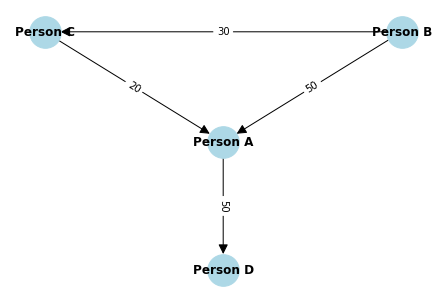

In [1]:
#Feed the debts in the form of a directed graph (let’s represent it by G) to the algorithm.
import networkx as nx
import matplotlib.pyplot as plt

def calculate_total_debt(graph):
    # Initialize a dictionary to store total debt for each person
    total_debt = {node: 0 for node in graph.nodes}

    # Iterate through each edge in the graph
    for edge in graph.edges:
        # Get the source and target nodes of the edge
        source, target = edge

        # Get the amount of debt on this edge
        debt_amount = graph[source][target]['debt']

        # Update the total debt for both source and target nodes
        total_debt[source] -= debt_amount
        total_debt[target] += debt_amount

    return total_debt

# Example usage:
# Create a directed graph representing debts
G = nx.DiGraph()

# Add edges with debt amounts
G.add_edge('Person B', 'Person A', debt=50)
G.add_edge('Person B', 'Person C', debt=30)
G.add_edge('Person C', 'Person A', debt=20)
G.add_edge('Person A', 'Person D', debt=50)

# Calculate total debts
total_debt_result = calculate_total_debt(G)

# Print the result
print("Total Debts:")
for person, debt in total_debt_result.items():
    print(f"{person}: {debt}")

def visualize_debt_graph(graph):
    # Extract debt amounts for labeling edges
    edge_labels = {(source, target): f"{graph[source][target]['debt']}" for source, target in graph.edges}
 
    # Draw the graph using Kamada-Kawai layout
    pos = nx.kamada_kawai_layout(graph)
    
   # Adjust the position of edge labels to prevent overlap
    pos_labels = {}
    for edge, (x, y) in pos.items():
        # Shift the label positions based on the direction of the edge
        if edge in edge_labels:
            shift = 0.05 if graph[edge[0]][edge[1]]['debt'] >= 0 else -0.05
            pos_labels[edge] = (x, y + shift)
            
    nx.draw(graph, pos, with_labels=True, node_size=1000, node_color='lightblue', font_weight='bold', arrowsize=20)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    # Display the plot
    plt.show()

# Visualize the debt graph
visualize_debt_graph(G)

In [2]:
 #Select one of the non-visited edges, say (u, v) from the directed graph G. (I don't feel it's correctly working) 
import networkx as nx
import matplotlib.pyplot as plt

def calculate_total_debt(graph):
    total_debt = {node: 0 for node in graph.nodes}
    for edge in graph.edges:
        source, target = edge
        debt_amount = graph[source][target]['debt']
        total_debt[source] -= debt_amount
        total_debt[target] += debt_amount
    return total_debt

def select_non_visited_edge(graph, visited_edges):
    for edge in graph.edges:
        if edge not in visited_edges:
            return edge
    return None

# Example usage:
G = nx.DiGraph()
G.add_edge('Person B', 'Person A', debt=50)
G.add_edge('Person B', 'Person C', debt=30)
G.add_edge('Person C', 'Person A', debt=20)
G.add_edge('Person A', 'Person D', debt=50)

visited_edges = set()

# Select a non-visited edge
selected_edge = select_non_visited_edge(G, visited_edges)

if selected_edge:
    visited_edges.add(selected_edge)
    print(f"Selected Edge: {selected_edge}")
else:
    print("All edges have been visited.")

# Calculate total debts
total_debt_result = calculate_total_debt(G)

# Print the result
print("\nTotal Debts:")
for person, debt in total_debt_result.items():
    print(f"{person}: {debt}")


Selected Edge: ('Person B', 'Person A')

Total Debts:
Person B: -80
Person A: 20
Person C: 10
Person D: 50
